#**Chatbot Mental Illness With Recurrent Neural Network (RNN)**
Ide di balik arsitektur RNN ini adalah bagaimana mengeksploitasi struktur data yang sekuensial. Nama RNN ini berasal dari fakta bahwa ia beroperasi secara berulang. Hal ini berarti bahwa operasi yang sama dilakukan untuk setiap elemen dari suatu urutan, dengan outputnya tergantung pada input saat ini dan operasi sebelumnya. Intinya adalah RNN berfokus pada sifat data dimana instans waktu saat sebelumnya atau saat ini (t) mempengaruhi instans pada waktu berikutnya (t + 1).

<b>Chatbot</b> merupakan bagian dari Natural Language Processing yang digunakan untuk percakapan dengan pengguna melalui teks dan ucapan. Pada praktik hari ini kita akan membuat sebuah chat otomatis menggunakan model sequential. **Sequence to Sequence (seq2seq)** adalah algoritma pembelajaran yang diawasi yang menggunakan Recurrent Neural Networks (RNNs). 

Chatbot ini bernama **botbestie** 😀. Apa yang dapat dilakukan oleh botbestie ini? bot ini dapat melakukan hal-hal berikut : 

*   Obrolan terkait penyakit mental
*   Mencari artikel terbaru tentang kesehatan mental
*   Memberi informasi cuaca berdasarkan kota yang di input
*   Mencari daftar lagu populer menurut billboard
*   Mengatur timer atau alarm
*   Melakukan searching menggunakan google chrome ( bisa digunakan jika sudah di deploy )
*  Memberi informasi tanggal dan waktu sekarang
*  Memberikan informasi berita terkini dan terupdate
*  Memberikan informasi Covid-19 disuatu wilayah
*  Terdapat feedback untuk memberikan bot ini data baru sebagai pembelajarn baru yang langsung diinputkan oleh user
*  text-to-speech
* pantun

<br>

**ANGGOTA KELOMPOK :**


1. AA YANA MAULANA AKBAR
2. MARET ISMOYO
3. DIPA RAIHAN
4. LINDA PUSPITASARI
5. BELLINA DEWI YULIANTI
6. MISCA
7. SALSABILA








# **Install dan Import Library**

**Install Library yang dibutuhkan**

In [ ]:
pip install billboard.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pygame==1.9.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install COVID19Py==0.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip -q install speechrecognition

     |████████████████████████████████| 32.8 MB 208 kB/s 


In [ ]:
pip -q install gtts

**Import Library yang dibutuhkan**

Sebelum melakukan preprocessing data adalah memasukan library yang akan digunakan untuk menganalisa dataset dengan menggunakan metode Deep Learning seperti RNN dalam pengolahan teks, Chatbot dll. Library yang saya gunakan yaitu NumPy untuk komputasi matematika, Matplotlib untuk visualisasi model data, Natural Language Toolkit atau NLTK untuk pengolahan teks, Pandas untuk membaca data, serta keras untuk model pada data menggunakan algoritma Sequence 2 Sequence

In [ ]:
import keras
import wordcloud
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
import random
import datetime
from googlesearch import *
import webbrowser
import requests
import billboard
import time
from pygame import mixer
import COVID19Py
import json
import nltk
import string
import pandas as pd
from gtts import gTTS
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import speech_recognition as sr 
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

#**Download file yang dibutuhkan**

File data Json

In [ ]:
!wget -O intents.json https://www.dropbox.com/s/2qjl4zq1thy0l7d/intents.json?dl=0

--2022-11-11 03:29:52--  https://www.dropbox.com/s/2qjl4zq1thy0l7d/intents.json?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2qjl4zq1thy0l7d/intents.json [following]
--2022-11-11 03:29:52--  https://www.dropbox.com/s/raw/2qjl4zq1thy0l7d/intents.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc52fa9a7373942754a54eacf768.dl.dropboxusercontent.com/cd/0/inline/BwjP2yO3oqscB6SbDv67hgF0u4cj4C0QdwoZ7G3zsbqTPh4E7xSiYgBORwXmdzXwUjw3EDLJJXwWACF5SxADn923ogbAq8nlaaZbeH24qZkl4G1BqCuFU8-o6sDFSX6qL4GNEVoKQbZw4OkMqzeZMnaMImXrw9dSh5x0nbzQ2Y4G5g/file# [following]
--2022-11-11 03:29:52--  https://uc52fa9a7373942754a54eacf768.dl.dropboxusercontent.com/cd/0/inline/BwjP2yO3oqscB6SbDv67hgF0u4cj4C0QdwoZ7G3zsbqTPh4E7xSiYgBORwXmdzXwUjw3EDLJJXw

File mp3 untuk alarm

In [ ]:
!wget -O Alarm.mp3 https://www.dropbox.com/s/64r9w1ntug5g4qn/Alarm.mp3?dl=0

--2022-11-11 03:16:43--  https://www.dropbox.com/s/64r9w1ntug5g4qn/Alarm.mp3?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/64r9w1ntug5g4qn/Alarm.mp3 [following]
--2022-11-11 03:16:43--  https://www.dropbox.com/s/raw/64r9w1ntug5g4qn/Alarm.mp3
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf54cc98c36eee224f8988d187e.dl.dropboxusercontent.com/cd/0/inline/Bwi03obljhbIPJriyfgl8XzC9LDrWMcQ7zU_AkmjsA3JopnDbNUZiiS4EkOs5a4jtkTLg4g8kkTeD2E8YtnrEvoAdAYSt7E-g3Copdy_k2FHSfOkqPywUen2u0kx5SNEcl5mGpIiRe2qoUU_sH7uhLYDk4h6wakWT6AhQ5p2gMzd6Q/file# [following]
--2022-11-11 03:16:43--  https://ucf54cc98c36eee224f8988d187e.dl.dropboxusercontent.com/cd/0/inline/Bwi03obljhbIPJriyfgl8XzC9LDrWMcQ7zU_AkmjsA3JopnDbNUZiiS4EkOs5a4jtkTLg4g8kkTeD2E8Ytnr

#**Download NLTK Package**

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# **Load Dataset Json**

Tahapan selanjutnya adalah me-load dataset yang telah disediakan. Data yang dipakai dalam proyek ini menggunakan dataset manual yang dibuat oleh anggota kelompok ini. Dataset yang digunakan berupa format **.json** yang sangat cocok untuk membuat model Chatbot. Data Json merupakan data yang termasuk dalam *semi structured* yang dimana data ini menampung beberapa bagian data seperti **tag**, **pattern**, **context**, dan **response**.

In [ ]:
# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words=[] # Data kata
classes=[] # Data Kelas atau Tag
documents=[] # Data Kalimat Dokumen
ignore=['?','!',',',"'s"] # Mengabaikan tanda spesial karakter

# mengimport dataset yang sudah didownload
data_file=open('/content/intents.json').read()
intents=json.loads(data_file)

Melakukan proses perulangan untuk mendapatkan data dari file.json kedalam setiap variabel list

In [ ]:
for intent in intents['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

In [ ]:
# Melakukan konversi data yang sudah diambil ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [ ]:
# Melihat isi dari dataframe
data

,patterns,tags
0,google,google
1,search,google
2,internet,google
3,OK google,google
4,What the time,datetime
...,...,...
668,beri saya pantun,pantun
669,bisakah kamu membuat pantun,pantun
670,pantun dong,pantun
671,kasih pantun dong,pantun


Setelah data tersebut berhasil dikonversi ke dalam sebuah dataframe, maka lankah selanjutnya adalah melakukan **preprocessing data**. 

# **Preprocessing Data**

Tahapan selanjutnya adalah praproses pada dataset yang kita gunakan saat ini, hal ini bertujuan untuk membersihkan data, melakuken tokenisasi pada data text, melakukan vectorisasi pada data text, melakukan encoding, dll. Agar menghasilkan data train yang baik dan model yang baik juga:


1. Remove Punctuations (Menghapus Punktuasi) menghilangkan tanda baca seperti tanda seru, tanda tanya, dll.

In [ ]:
import string
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))
data

,patterns,tags
0,google,google
1,search,google
2,internet,google
3,ok google,google
4,what the time,datetime
...,...,...
668,beri saya pantun,pantun
669,bisakah kamu membuat pantun,pantun
670,pantun dong,pantun
671,kasih pantun dong,pantun


2.   Lematization (Lematisasi)  merubah suatu kata ke dalam bentuk dasar dari kata tersebut

In [ ]:
words=[lemmatizer.lemmatize(word.lower()) for word in words if word not in ignore]
words=sorted(list(set(words)))
classes=sorted(list(set(classes)))

print (len(words), "unique lemmatized words", words)
print (len(classes), "classes", classes)

713 unique lemmatized words ['(', ')', '-', '.', '10', '19', '19+', '25', '[', ']', 'a', 'ada', 'adakah', 'adalah', 'adhd', 'afternoon', 'agama', 'agar', 'akan', 'akibat', 'aku', 'alami', 'alarm', 'alasan', 'alkohol', 'aman', 'ambang', 'anak', 'anak-anak', 'anda', 'aneh', 'antara', 'antidepresan', 'antisosial', 'apa', 'apakah', 'arti', 'article', 'artikel', 'artinya', 'asal', 'aspd', 'assalamualaikum', 'asuransi', 'atau', 'awal', 'bagaimana', 'bagi', 'bagian', 'bagimana', 'bahagia', 'bahwa', 'bai', 'baik', 'banget', 'bantu', 'bantuan', 'bantuanmu', 'banyak', 'banyaknya', 'baru', 'bayar', 'bebahaya', 'beberapa', 'bekerja', 'belajar', 'benar', 'benar-benar', 'bener', 'berada', 'berapa', 'berarti', 'berasal', 'berbagi', 'berbahaya', 'berbiaya', 'berbicara', 'berfikir', 'berguna', 'berhenti', 'beri', 'berita', 'beritahu', 'berjuang', 'berkecukupan', 'berkualitas', 'berlebihan', 'berobat', 'berpelukan', 'berpikir', 'berpotensi', 'bersenang-senang', 'bersepeda', 'berteman', 'bertemu', 'besar

In [ ]:
# menggabungkan pattern dan intents ke dalam documents
print (len(documents), "documents")

3645 documents


3.   Tokenization (Tokenisasi)

In [ ]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[226],
 [351],
 [352],
 [353, 226],
 [161, 162, 227],
 [161, 227, 129, 228],
 [102, 59, 60],
 [60, 102, 59],
 [43, 102, 59],
 [102],
 [163, 59, 60],
 [60, 163, 59],
 [163],
 [354, 355, 162, 356],
 [164],
 [161, 164, 129, 129, 357],
 [358, 1, 60, 102, 59],
 [43, 61, 3],
 [60, 61, 3],
 [61],
 [359],
 [360],
 [361, 229, 129, 228],
 [230],
 [362],
 [363, 230],
 [165],
 [364, 165],
 [365, 165],
 [231],
 [366],
 [231, 367],
 [166, 103],
 [368, 103],
 [229, 103],
 [166, 232, 103],
 [166, 369, 103],
 [81, 370],
 [81, 371],
 [81, 372],
 [81, 373],
 [81, 374],
 [81, 233],
 [232, 81, 233],
 [375, 376, 234],
 [235],
 [377],
 [378, 235],
 [234],
 [167, 236],
 [167],
 [34, 167],
 [379],
 [380],
 [381],
 [382],
 [383],
 [384],
 [237],
 [238],
 [239],
 [385],
 [386],
 [240],
 [387],
 [388],
 [389],
 [390],
 [391],
 [241],
 [392],
 [242, 241],
 [130, 393],
 [394, 395],
 [396],
 [397, 243],
 [398],
 [399, 243],
 [244, 168],
 [400],
 [244, 168, 70],
 [3, 401, 44, 14, 2],
 [3, 11, 14, 2],
 [3, 11, 2, 71]

4.   Melakukan Encoding dan Apply Padding

In [ ]:
# Apply padding 
x_train = pad_sequences(train)

# Encoding the outputs 
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [ ]:
print(x_train) # Padding Sequences

[[  0   0   0 ...   0   0 226]
 [  0   0   0 ...   0   0 351]
 [  0   0   0 ...   0   0 352]
 ...
 [  0   0   0 ...   0 101 350]
 [  0   0   0 ... 168 101 350]
 [  0   0   0 ...   0 705 101]]


In [ ]:
print(y_train) #Label Encodings

[ 51  51  51  51  34  34  34  34  34  34  34  34  34  34  34  34  34  34
  34  34 152 152 152 152 152 152  90  90  90  90  90  90 140 140 140 140
 140 140 140 140 140 140 140 140 149 149 149 149 149  32  32  32  52  52
  52  52  52  52  52  52  52  52  52  52  52  52  52  50  50  50  50  50
  50  50  50  50 146 146 146 146 146 109 109 109 109 109 109 109 109 107
 107 107 107 113 113 113 113 113 113 113  46  46  46  46  46  46  46  46
  46 139 139 139 139 139 139  97  97  97  97 157 157 157 157 157 157 114
 114 114 114 114 108 108 108 108 108 116 116 116 116 116 116 116 116  64
  64  64  64  81  81 104 104 104 104 104  15  15  15  15  15  15 105 105
 105 105 105 105 105 105 134 134 134 134 134 134  80  80  80  80  80  80
  80 145 145 145 145 145 145  63  63  63  63  63  64  64 144 144 144 144
 127 127 127 127 127 127  77  77  77  77 150 150 150 150 150 122 122 122
 122  72  72  72  38  38  38 103 103 103 103  96  96  96  96 112 112 112
 112  67  67  67 148 148 148   3   3   3  12  12   

Tokenizer pada Tensorflow memberikan token unik untuk setiap kata yang berbeda. Dan juga padding dilakukan untuk mendapatkan semua data dengan panjang yang sama sehingga dapat mengirimkannya ke lapisan atau layer RNN. variabel target juga dikodekan menjadi nilai desimal.

# **Input Length, Output Length and Vocabulary**

In [ ]:
# input length
input_shape = x_train.shape[1]
print(input_shape)

23


In [ ]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("Jumlah kata unik : ", vocabulary)

# output length
output_length = le.classes_.shape[0]
print("Panjang output : ", output_length)

Jumlah kata unik :  705
Panjang output :  159


**Input length** dan **output length** terlihat sangat jelas hasilnya. Mereka adalah untuk bentuk input dan bentuk output dari jaringan syaraf pada algoritma Neural Network.

**Vocabulary Size** adalah untuk lapisan penyematan untuk membuat representasi vektor unik untuk setiap kata.

**Save Model Words & Classes**

In [ ]:
pickle.dump(words, open('/content/words.pkl','wb'))
pickle.dump(classes, open('/content/classes.pkl','wb'))

#**Training Data & Modeling Recurrent Neural Network (RNN)**

Melakukan training pada data yang sudah melewati proses praprosesing

In [ ]:
#training data
training=[]
output_empty=[0]*len(classes)

In [ ]:
for doc in documents:
    bag=[] # list bag of word
    pattern=doc[0]
    pattern=[ lemmatizer.lemmatize(word.lower()) for word in pattern ]
    
    for word in words: 
        if word in pattern:
            bag.append(1)
        else:
            bag.append(0)
    output_row=list(output_empty)
    output_row[classes.index(doc[1])]=1
    
    training.append([bag,output_row])
    
random.shuffle(training)
training=np.array(training)  
X_train=list(training[:,0])
y_train=list(training[:,1]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
training

array([[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Sequence model adalah pemrosesan pada input yang berurutan

In [ ]:
#Membuat model seq2seq untuk training data
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(len(X_train[0]),)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]),activation='softmax'))

In [ ]:
# Compiling the model (Kompilasi Model)
adam=keras.optimizers.Adam(0.001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

# Training the model (Latih Model Data)
weights=model.fit(np.array(X_train),np.array(y_train),epochs=400,batch_size=10,verbose=1)    

Epoch 1/400
365/365 [==============================] - 4s 3ms/step - loss: 4.3878 - accuracy: 0.1075
Epoch 2/400
365/365 [==============================] - 1s 3ms/step - loss: 3.2204 - accuracy: 0.2713
Epoch 3/400
365/365 [==============================] - 1s 3ms/step - loss: 2.4985 - accuracy: 0.4219
Epoch 4/400
365/365 [==============================] - 1s 3ms/step - loss: 1.9909 - accuracy: 0.5295
Epoch 5/400
365/365 [==============================] - 1s 3ms/step - loss: 1.6292 - accuracy: 0.5855
Epoch 6/400
365/365 [==============================] - 1s 3ms/step - loss: 1.3726 - accuracy: 0.6461
Epoch 7/400
365/365 [==============================] - 1s 3ms/step - loss: 1.1494 - accuracy: 0.6979
Epoch 8/400
365/365 [==============================] - 1s 3ms/step - loss: 0.9981 - accuracy: 0.7273
Epoch 9/400
365/365 [==============================] - 1s 3ms/step - loss: 0.9207 - accuracy: 0.7443
Epoch 10/400
365/365 [==============================] - 1s 3ms/step - loss: 0.8281 - accura

**Save Model hasil training**

In [ ]:
#save model
model.save('mymodel.h5',weights)

In [ ]:
model.summary() # Menampilkan Parameter Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               91392     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 159)               10335     
                                                                 
Total params: 114,143
Trainable params: 114,143
Non-trai

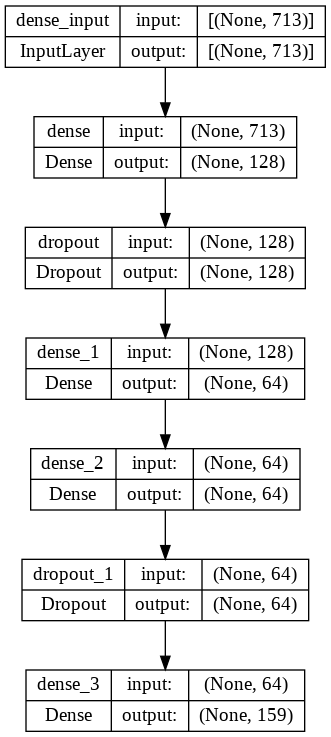

In [ ]:
# Visualization Plot Architecture Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='/content/model_plot.png', show_shapes=True, show_layer_names=True)

# **Model Analysis**

Setelah menjalankan model fitting. Selanjutnya adalah analisa model untuk melihat hasil akurasi dari model Neural Network tersebut.

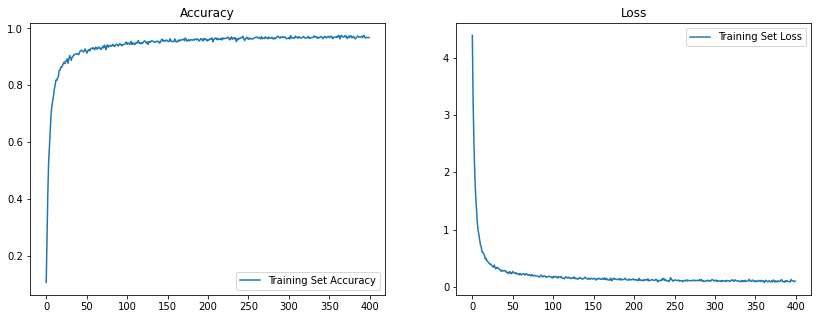

In [ ]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(weights.history['accuracy'],label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(weights.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

# **Membuat Aplikasi Chat bot**

In [ ]:
#Load model 
#memanggil model yang sudah dibuat
from keras.models import load_model
model = load_model('/content/mymodel.h5')
intents = json.loads(open('/content/intents.json').read())
words = pickle.load(open('/content/words.pkl','rb'))
classes = pickle.load(open('/content/classes.pkl','rb'))

In [ ]:
# Fungsi untuk cleanig input
def clean_up(sentence):
    sentence_words=nltk.word_tokenize(sentence)
    sentence_words=[ lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

In [ ]:
#Fungsi untuk membuat bag of words
def create_bow(sentence,words):
    sentence_words=clean_up(sentence)
    bag=list(np.zeros(len(words)))
    
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
    return np.array(bag)

In [ ]:
# Fungsi predict
def predict_class(sentence,model):
    p=create_bow(sentence,words)
    res=model.predict(np.array([p]))[0]
    threshold=0.8
    results=[[i,r] for i,r in enumerate(res) if r>threshold]
    results.sort(key=lambda x: x[1],reverse=True)
    return_list=[]
    
    for result in results:
        return_list.append({'intent':classes[result[0]],'prob':str(result[1])})
    return return_list

In [ ]:
#Fungsi untuk memberikan responses
def get_response(return_list,intents_json):
    
    if len(return_list)==0:
        tag='noanswer'
    else:    
        tag=return_list[0]['intent']
    
    #Perintah menampilkan tanggal dan waktu
    if tag=='datetime':        
        print(time.strftime("%A"))
        print (time.strftime("%d %B %Y"))
        print (time.strftime("%H:%M:%S"))

    #Perintah melakukan searching google
    #ini tidak akan berfungsi di google colab
    if tag=='google':
        query=input('Masukan kata kunci...')
        chrome_path = r'C:\Program Files\Google\Chrome\Application\chrome.exe %s'
        for url in search(query, tld="co.in", num=1, stop = 1, pause = 2):
            webbrowser.open("https://google.com/search?q=%s" % query)

    #Perintah menampilkan weather
    if tag=='weather':
        api_key='a2c18c25aec3ada06383db42dd49aa96'
        base_url = "http://api.openweathermap.org/data/2.5/weather?"
        city_name = input("Masukan nama kota : ")
        complete_url = base_url + "appid=" + api_key + "&q=" + city_name
        response = requests.get(complete_url) 
        x=response.json()
        print('Suhu Sekarang : ',round(x['main']['temp']-273,2),'celcius ')
        print('Terasa Seperti : ',round(x['main']['feels_like']-273,2),'celcius ')
        print(x['weather'][0]['main'])

    #Perintah mencari dan menampilkan berita       
    if tag=='news':
        main_url = " https://newsapi.org/v2/top-headlines?country=id&apiKey=5c1cd00af97e4af1ae7b998a5930943a"
        open_news_page = requests.get(main_url).json()
        article = open_news_page["articles"]
        results = [] 
          
        for ar in article: 
            results.append([ar["title"],ar["url"]]) 
          
        for i in range(10): 
            print(i + 1, results[i][0])
            print(results[i][1],'\n')

    #Perintah mencari dan menampilkan artikel mental health
    if tag=='more':
        url = "https://mental-health-info-api.p.rapidapi.com/news/thetimes"
        headers = {
            "X-RapidAPI-Key": "b3fef9efdamshc19adc8de8d7e87p1adfc8jsn812c2f7bcb57",
            "X-RapidAPI-Host": "mental-health-info-api.p.rapidapi.com"}
        response = requests.get(url, headers=headers).json()
        results1 = [] 
        for ar in response: 
            results1.append([ar["title"],ar["url"]]) 
        for i in range(5): 
            print(i + 1, results1[i][0])
            print(results1[i][1],'\n')

    #Perintah mencari dan menampilkan daftar musik
    if tag=='song':
        chart=billboard.ChartData('hot-100')
        print('10 Lagu teratas saat ini :')
        for i in range(10):
            song=chart[i]
            print(song.title,'- ',song.artist)

    #Perintah mengatur timer
    #Mungin ini tidak berfungsi di google colab
    if tag=='timer':        
        mixer.init()
        x=input('Minutes to timer..')
        time.sleep(float(x)*60)
        mixer.music.load('/content/Alarm.mp3')
        mixer.music.play()
        
    #Perintah mencari dan menampilkan informasi covid19
    if tag=='covid19':
        
        covid19=COVID19Py.COVID19(data_source='jhu')
        country=input('Enter Location...')
        
        if country.lower()=='world':
            latest_world=covid19.getLatest()
            print('Confirmed:',latest_world['confirmed'],' Deaths:',latest_world['deaths'])
        
        else:
                
            latest=covid19.getLocations()
            
            latest_conf=[]
            latest_deaths=[]
            for i in range(len(latest)):
                
                if latest[i]['country'].lower()== country.lower():
                    latest_conf.append(latest[i]['latest']['confirmed'])
                    latest_deaths.append(latest[i]['latest']['deaths'])
            latest_conf=np.array(latest_conf)
            latest_deaths=np.array(latest_deaths)
            print('Confirmed: ',np.sum(latest_conf),'Deaths: ',np.sum(latest_deaths))

    list_of_intents= intents_json['intents']    
    for i in list_of_intents:
        if tag==i['tag'] :
            result= random.choice(i['responses'])
    return result

In [ ]:
# FUngsi untuk menjalankan aplikasi
def response(text):
    return_list=predict_class(text,model)
    response=get_response(return_list,intents)
    return response

while(1):
    x=input()
    print(response(x))
    tts = gTTS(response(x), lang='id')
    tts.save('/content/bot.wav')
    time.sleep(0.08)
    ipd.display(ipd.Audio('/content/bot.wav', autoplay=True))
    print("="*60 + "\n")
    if x.lower() in ['bye','goodbye','get lost','see you']:  
        break

1/1 [==============================] - 0s 89ms/step
Halo! Saya BestieBot, salam kenal ya! Mau tau tentang mental health, kan?
1/1 [==============================] - 0s 14ms/step



1/1 [==============================] - 0s 16ms/step
Jadi, meskipun Anda dan teman Anda mungkin memilih untuk minum, cara dan alasan Anda menggunakan alkohol mungkin berbeda.
1/1 [==============================] - 0s 15ms/step


Selain itu juga bot ini bisa melatih dirinya sendiri berdasarkan inputan atau perintah dari user

In [ ]:
#Self learning
print('Bantu saya mempelajari hal baru?')
tag=input('Masukan kategori pertanyaan : ')
flag=-1
for i in range(len(intents['intents'])):
    if tag.lower() in intents['intents'][i]['tag']:
        intents['intents'][i]['patterns'].append(input('Tulis pesan anda : '))
        intents['intents'][i]['responses'].append(input('Masukan jawaban yang anda harapkan : '))        
        flag=1

if flag==-1:
    
    intents['intents'].append (
        {'tag':tag,
         'patterns': [input('Tulis pesan anda ')],
         'responses': [input('Masukan jawaban yang anda harapkan ')]})
    
with open('intents.json','w') as outfile:
    outfile.write(json.dumps(intents,indent=4))

#**Kesimpulan**

Data hasil source code yang sudah dijalankan, terdapat beberapa tahapan yang dilakukan. Antara lain :
1.	Menginstall library yang dibutuhkan.
2.	Mengimport library yang dibutuhkan. 
3.	Mendownload file yang dibutuhkan (file data JSON dan file mp3 untuk alarm).
4.	Mendownload NLTK package.
5.	Me-load dataset JSON, lalu melakukan proses perulangan untuk mendapatkan data dari file.json kedalam setiap variabel list
6.	Melakukan preprocessing data (Remove Punctuations, Lematization, Tokenization, Encoding dan Apply Padding).
7.	Melakukan Input Length, Output Length and Vocabulary. Lalu Save Model Words & Classes.
8.	Melakukan training pada data yang sudah melewati proses preprocessing. Lalu save model hasil training.
9.	Melakukan Model Analysis.
10.	Membuat aplikasi Chatbot.

Pada pembuatan Chatbot kali ini, diharapkan untuk memahami dan membaca setiap detail yang ada pada dataset yang digunakan. Karena dalam hal ini ada tahapan menggunakan beberapa dataset yang di gabungkan, karena dataset yang digunakan saling berhubungan serta menjadikannya sebuah dataset yang dapat dibaca oleh mesin. Dimana harapannya mesin dapat menemukan jawaban yang akurat dari inputan user.

## **Reference**

Artikel : 

[TAG: SEQUENCE MODEL](https://indoml.com/tag/sequence-model/) 

[Sequence-to-Sequence Algorithm](https://docs.aws.amazon.com/id_id/sagemaker/latest/dg/seq-2-seq.html) 

 [Recurrent Neural Network (RNN)](https://machinelearning.mipa.ugm.ac.id/2018/07/01/recurrent-neural-network-rnn/)

 Code & dataset :

GitHub [Chatbot-Neural-Network](https://github.com/amitpatyal/Chatbot-Neural-Network/blob/master/chatbot_app.py)

GitHub [chatbot](https://github.com/yannaakbar/chatbot)

GitHub [chatbot-indonesia](https://github.com/binsarjr/chatbot-indonesia)

Kaggle [Mental Health FAQ for Chatbot](https://www.kaggle.com/datasets/narendrageek/mental-health-faq-for-chatbot?resource=download)